In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection, validation and preparation

## Loading data into a df

In [ ]:
column_names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain','capital-loss', 'hours-per-week', 
                'native-country', 'yearly_income']

df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df_raw.columns = column_names
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  yearly_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Checking for null values


In [ ]:
for column_name in column_names:
  print(df_raw[column_name].value_counts(), '\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype

#### null values are represented in this dataset with ` ?`. Columns with null values:


*   `workclass`.
*   `occupation`.
*   `native-country`.

In [ ]:
# Replacing ' ?' for nan
for column_name in column_names:
  df_raw[column_name] = np.where(df_raw[column_name] == ' ?', np.nan, df_raw[column_name])

In [ ]:
df_raw.shape

(32561, 15)

In [ ]:
# Checking if there are null values in each column
df_raw.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
yearly_income     False
dtype: bool

In [ ]:
# Counting null values for column
df_raw.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
yearly_income        0
dtype: int64

In [ ]:
# Counting null values in df
df_raw.isnull().sum().sum()

4262

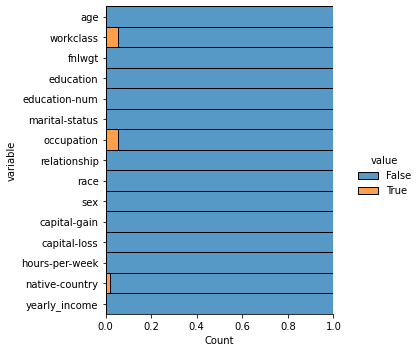

In [ ]:
# % null values per variable
df_raw.isnull().melt().pipe(
                  lambda df : (
                      sns.displot(
                          data=df,
                          y='variable',
                          hue='value',
                          multiple='fill'
                          )
                      )
                  )

<Axes: >

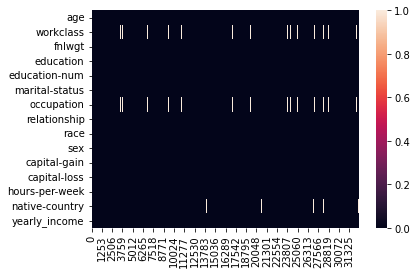

In [ ]:
df_raw.isnull().transpose().pipe(
                        lambda df: (
                            sns.heatmap(
                                data=df
                                )
                            )
                        )

In [ ]:
df = df_raw.dropna(subset=['workclass','occupation'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30718 non-null  float64
 1   workclass       30718 non-null  object 
 2   fnlwgt          30718 non-null  float64
 3   education       30718 non-null  object 
 4   education-num   30718 non-null  float64
 5   marital-status  30718 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    30718 non-null  object 
 8   race            30718 non-null  object 
 9   sex             30718 non-null  object 
 10  capital-gain    30718 non-null  float64
 11  capital-loss    30718 non-null  float64
 12  hours-per-week  30718 non-null  float64
 13  native-country  30162 non-null  object 
 14  yearly_income   30718 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_raw.yearly_income.value_counts()

 <=50K    24720
 >50K      7841
Name: yearly_income, dtype: int64

In [ ]:
df.yearly_income.value_counts()

 <=50K    23068
 >50K      7650
Name: yearly_income, dtype: int64

## Knowing the data

### Data preparation

In [ ]:
obj = (df.dtypes == object)
obj_cols = [c for c in obj.index if obj[c] == True]
obj_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'yearly_income']

In [ ]:
# Removing spaces 
for obj_col in obj_cols:
  df[obj_col] = df[obj_col].str.strip()

<ipython-input-16-8dd9e9818148>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[obj_col] = df[obj_col].str.strip()


In [ ]:
mandatory = (
    (df['education'] == 'Preschool') | (df['education'] == '1st-4th') | (df['education'] == '5th-6th') |
    (df['education'] == '7th-8th') | (df['education'] == '9th') | (df['education'] == '10th') | 
    (df['education'] == '11th') | (df['education'] == '12th')
             )
high_school_grad = (df['education'] == 'HS-grad')
associate_degree = (df['education'] == 'Assoc-acdm') | (df['education'] == 'Assoc-voc')
bachelor_degree = (df['education'] == 'Bachelors') | (df['education'] == 'Some-college')

# Reducing 
df['education_groups'] = np.where(mandatory, 'mandatory',
                                 np.where(high_school_grad, 'high_school_grad',
                                          np.where(associate_degree, 'associate_degree', 
                                                   np.where(associate_degree, 'associate_degree',
                                                            np.where(bachelor_degree, 'bachelors_degree', df['education'])
                                                            )
                                                   )
                                          )
                                 )

df['married'] = np.where(df['marital-status'] == 'Never-married', 0,
                                  np.where(df['marital-status'] == 'Divorced', 0,
                                           np.where(df['marital-status'] == 'Separated', 0,
                                                    np.where(df['marital-status'] == 'Widowed', 0, 1)
                                                    )
                                           )
                                  )
df['race_groups'] = np.where(df['race'] != 'White', 'minority', df['race'])

df['us_native_country'] = np.where(df['native-country']=='United-States', 1, 0)

<ipython-input-17-c9c16c8a8fed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_groups'] = np.where(mandatory, 'mandatory',
<ipython-input-17-c9c16c8a8fed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['married'] = np.where(df['marital-status'] == 'Never-married', 0,
<ipython-input-17-c9c16c8a8fed>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
obj = (df.dtypes == object)
obj_cols = [c for c in obj.index if obj[c] == True]
obj_cols.append('married')
obj_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'yearly_income',
 'education_groups',
 'race_groups',
 'married']

In [ ]:
all_columns = list()
education = ['education', 'education_groups']
native_country = ['native-country', 'us_native_country']
race = ['race','race_groups']
marital_status = ['marital-status','married']


all_columns.extend(education)
all_columns.extend(native_country)
all_columns.extend(race)
all_columns.extend(marital_status)

all_columns

['education',
 'education_groups',
 'native-country',
 'us_native_country',
 'race',
 'race_groups',
 'marital-status',
 'married']

In [ ]:
for column in all_columns:
  print(column)
  try:
    obj_cols.remove(column)
  except ValueError as e:
    print(e)

education
education_groups
native-country
us_native_country
list.remove(x): x not in list
race
race_groups
marital-status
married


### Insights:


*   In `workclass`, "self-empl-inc" and "Private" are groups that concentrates a lot og high-income data points.
*   *Exec-managerial* and *Prof-specialty* are the `occupation`s gather a great % of people who get > 50k annually.
*   *Husbands* group a huge % of people who earn more than 50k.
*   In `gender`, male people gather a lot of samples of people who make more than 50k.
*   It is find that people with bachelor degrees or higher level education degrees then to more than 50k.
*   The group of **people that were born in US** get a higher % of people who has income above 50k.
*   *White people* has a higher % of people who make more than 50k vs. *minority group of people*.
*   *Married people* get together a huge % of people who earn more than 50k.
*   `Age` distribution are right-skewed. People who make more than 50k has a higher median vs low-income group.
*   There is a gap between low-level income group and high-income group in terms of `capital-gain`.


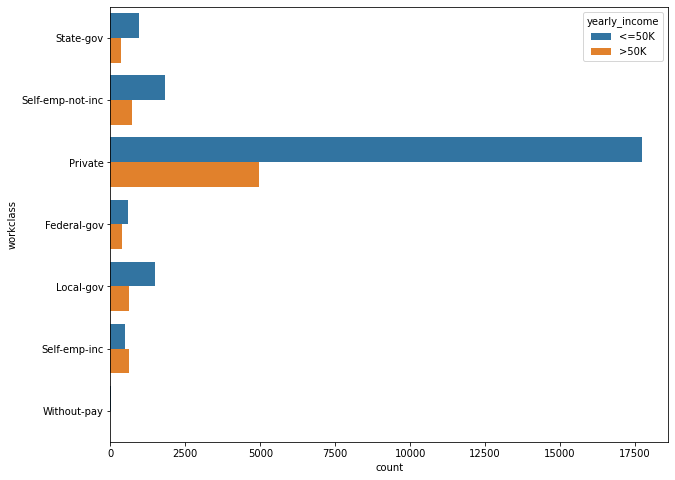

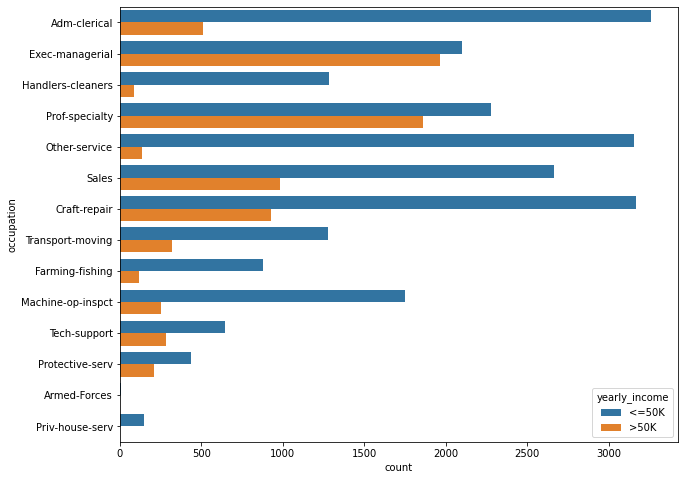

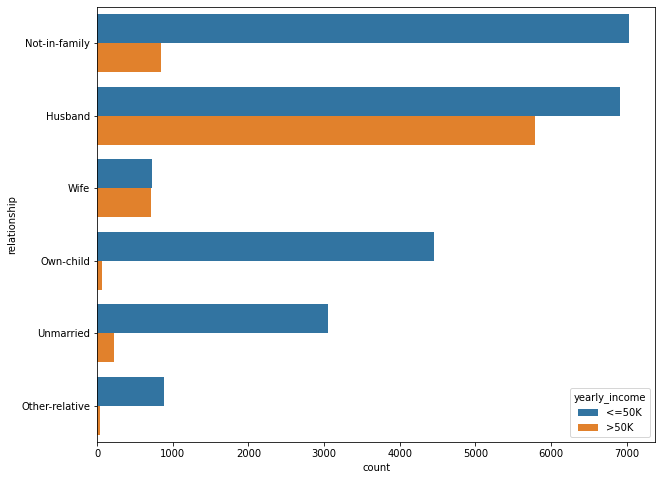

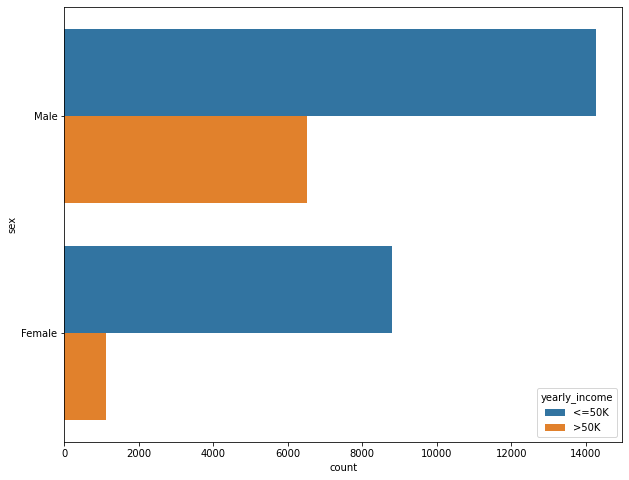

In [ ]:
for obj_col in obj_cols:
  if obj_col not in ['yearly_income']:
    plt.figure(figsize=(10,8))
    sns.countplot(
        data = df
        , y = obj_col
        , hue = 'yearly_income'
    )   
    plt.show()
    print('\n')

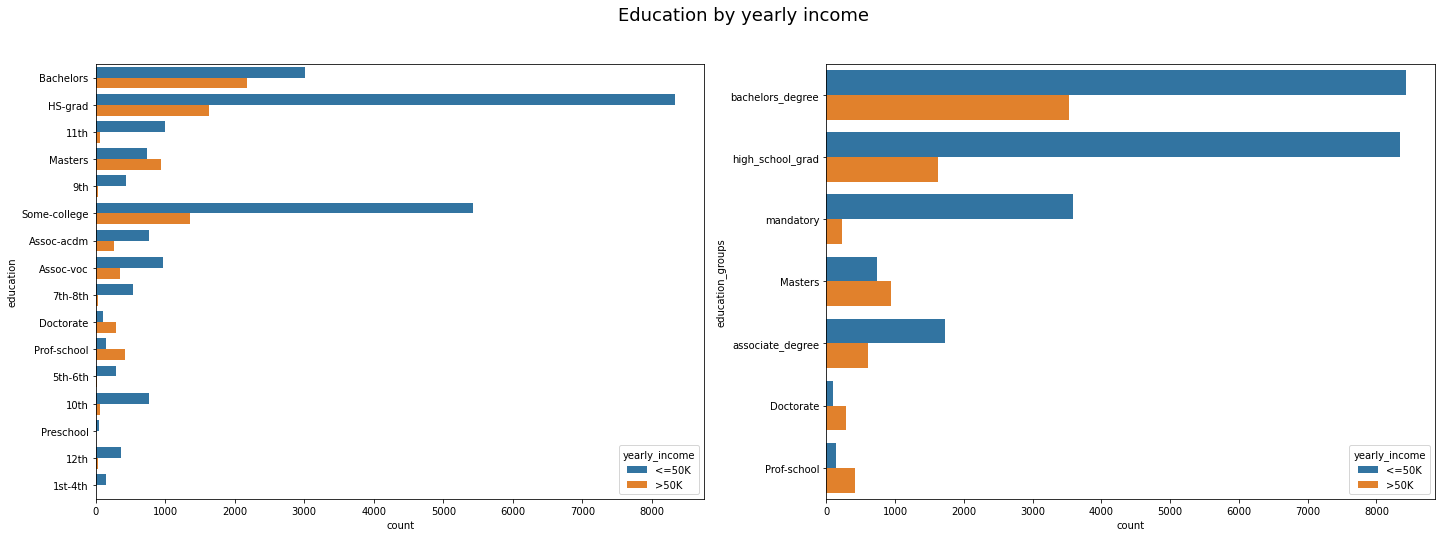

In [ ]:
fig, ax = plt.subplots(1, len(education), figsize=(24, 8))

for idx, column in enumerate(education):

    ax[idx] = sns.countplot(
        data = df
        , y = column
        , hue = 'yearly_income'
        , ax = ax[idx]
    ) 

fig.suptitle('Education by yearly income', fontsize=18)
plt.show()

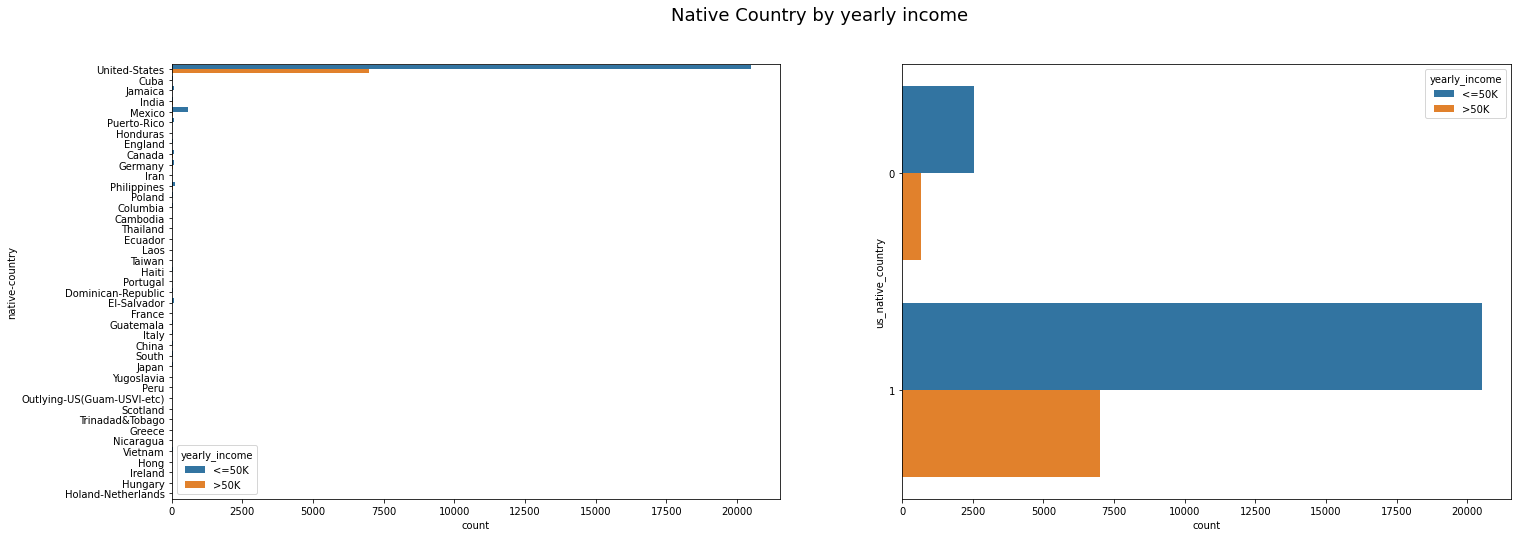

In [ ]:
fig, ax = plt.subplots(1, len(native_country), figsize=(24, 8))

for idx, column in enumerate(native_country):

    ax[idx] = sns.countplot(
        data = df
        , y = column
        , hue = 'yearly_income'
        , ax = ax[idx]
    ) 

fig.suptitle('Native Country by yearly income', fontsize=18)
plt.show()

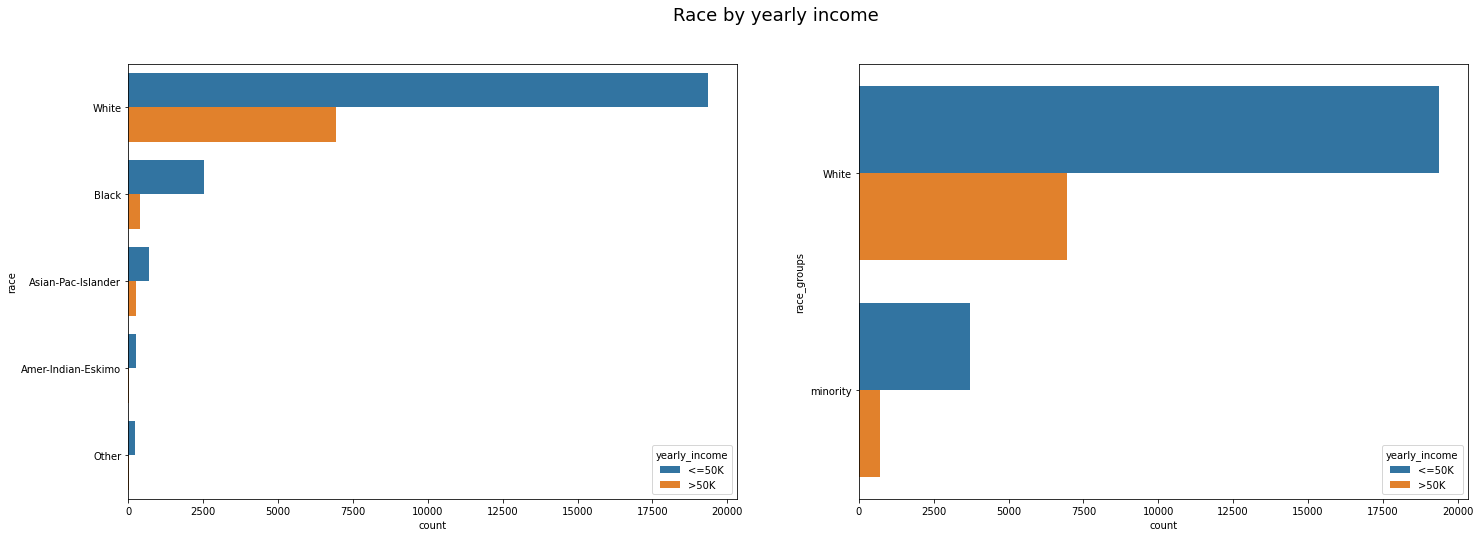

In [ ]:
fig, ax = plt.subplots(1, len(race), figsize=(24, 8))

for idx, column in enumerate(race):

    ax[idx] = sns.countplot(
        data = df
        , y = column
        , hue = 'yearly_income'
        , ax = ax[idx]
    ) 

fig.suptitle('Race by yearly income', fontsize=18)
plt.show()

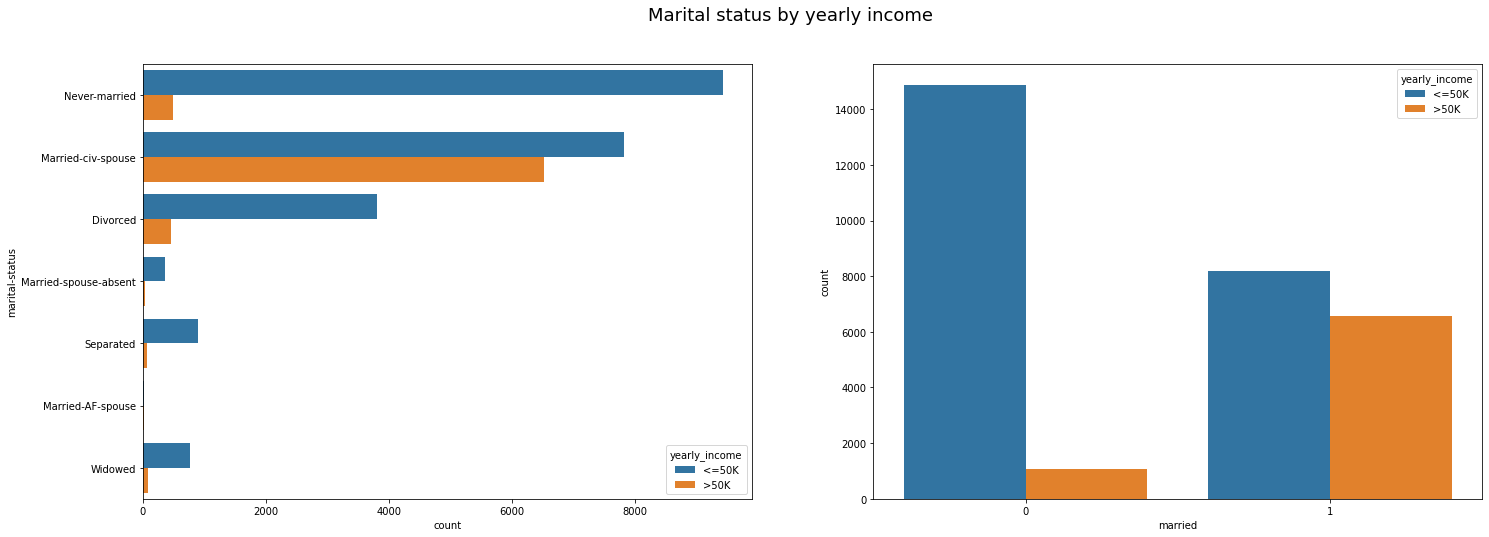

In [ ]:
fig, ax = plt.subplots(1, len(marital_status), figsize=(24, 8))

for idx, column in enumerate(marital_status):
    if idx == 0 :
      ax[idx] = sns.countplot(
          data = df
          , y = column
          , hue = 'yearly_income'
          , ax = ax[idx]
      )

    else:
      ax[idx] = sns.countplot(
          data = df
          , x = column
          , hue = 'yearly_income'
          , ax = ax[idx]
      )

fig.suptitle('Marital status by yearly income', fontsize=18)
plt.show()

In [ ]:
num = (df.dtypes == float) | (df.dtypes == int)
num_cols = [c for c in num.index if num[c] == True]
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'married',
 'us_native_country']

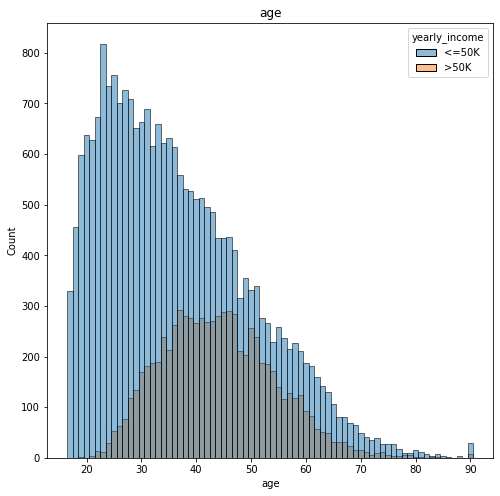

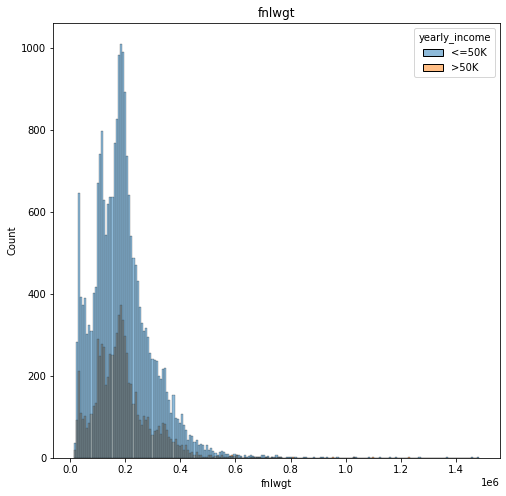

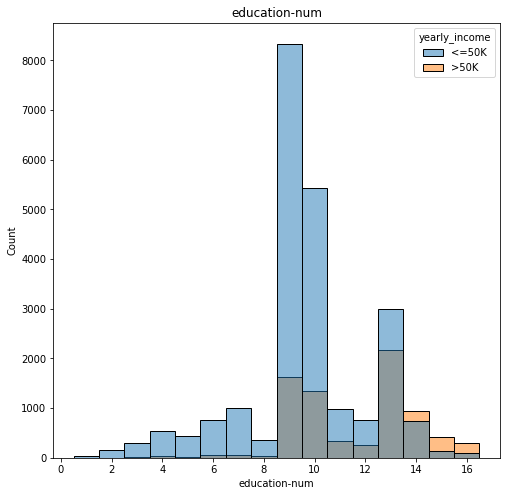

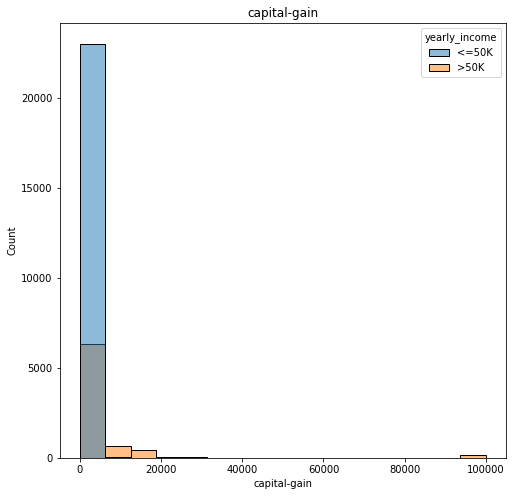

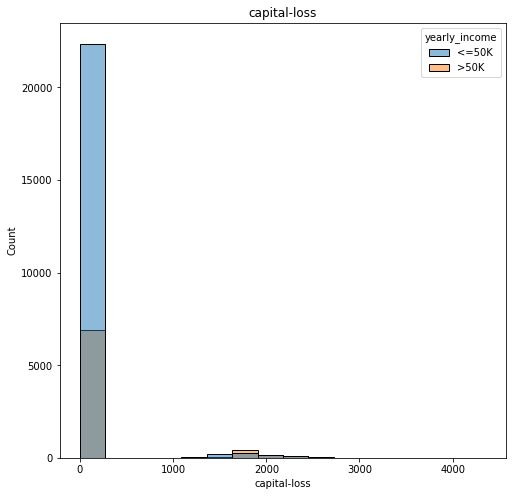

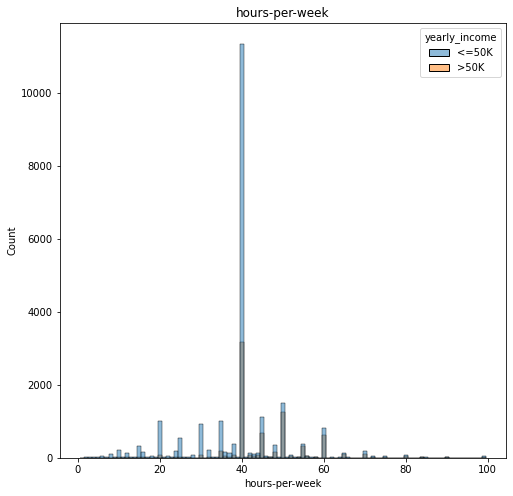

In [ ]:
num_cols.remove('us_native_country')
num_cols.remove('married')

for num_col in num_cols:
  plt.figure(figsize=(8,8))
  if num_col in ['age', 'education-num','hours-per-week']:
    sns.histplot(
        data=df
        , x=num_col
        , discrete =True
        , hue='yearly_income'
    )
    plt.title(num_col)
    plt.show()
    print('\n')
  
  else:
    sns.histplot(
        data=df
        , x=num_col
        , hue='yearly_income'
    )
    plt.title(num_col)
    plt.show()
    print('\n')

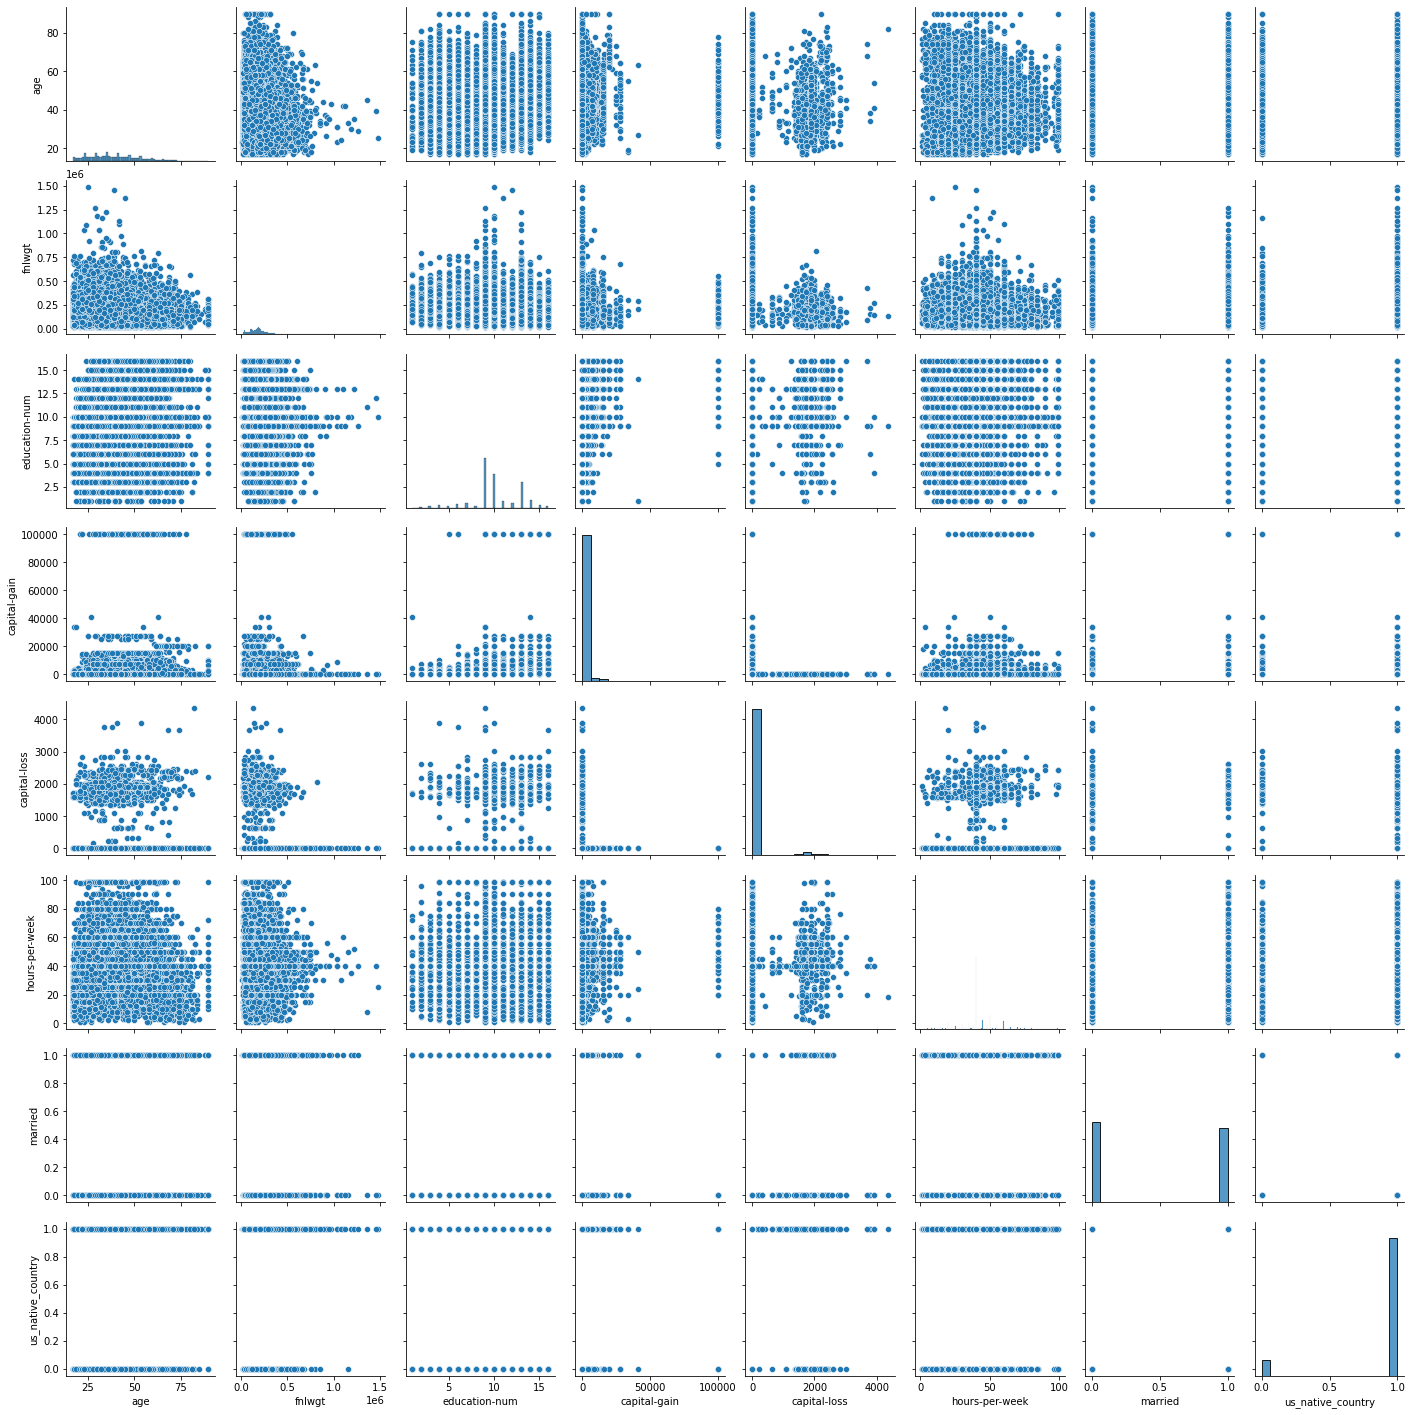

In [ ]:
sns.pairplot(
    data=df
)

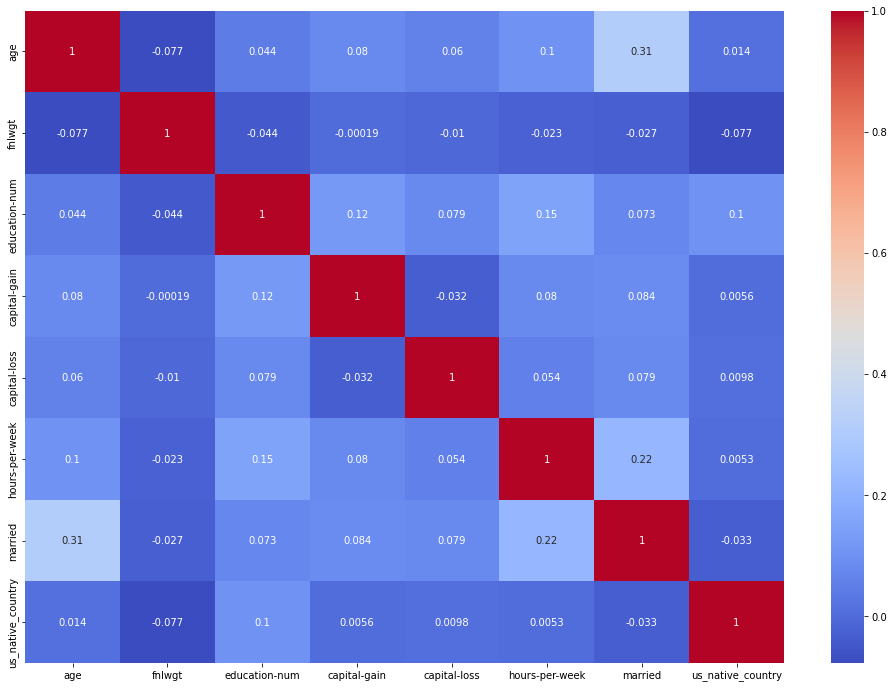

In [ ]:
fig = plt.figure(figsize=(17,12))
sns.heatmap(
    df.corr()
    , annot=True
    , cmap = 'coolwarm'
)

plt.show()

# Models

In [ ]:
from sklearn.tree import (DecisionTreeClassifier, plot_tree)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)
from sklearn.preprocessing import (OrdinalEncoder, OneHotEncoder)
from sklearn.metrics import (classification_report, accuracy_score, balanced_accuracy_score,
                             f1_score, precision_score, recall_score, confusion_matrix)

## Preprocessing and featuring engineering

In [ ]:
features = df.drop(['native-country','marital-status','relationship','race'], axis=1)
features['more_than_50k'] = np.where(features['yearly_income'] == '>50K', 1, 0)

features.drop(['yearly_income'], axis=1, inplace=True)

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, 
                         categories= [
                              ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
                              'HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Some-college',
                              'Bachelors','Masters','Doctorate']
                              , ['mandatory','high_school_grad','associate_degree','Prof-school'
                              ,'bachelors_degree','Masters','Doctorate']
                            ]
)

In [ ]:
features[['education','education_groups']] = ord_enc.fit_transform(features[['education','education_groups']])
features.head()

,age,workclass,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,education_groups,married,race_groups,us_native_country,more_than_50k
0,39.0,State-gov,77516.0,13.0,13.0,Adm-clerical,Male,2174.0,0.0,40.0,4.0,0,White,1,0
1,50.0,Self-emp-not-inc,83311.0,13.0,13.0,Exec-managerial,Male,0.0,0.0,13.0,4.0,1,White,1,0
2,38.0,Private,215646.0,8.0,9.0,Handlers-cleaners,Male,0.0,0.0,40.0,1.0,0,White,1,0
3,53.0,Private,234721.0,6.0,7.0,Handlers-cleaners,Male,0.0,0.0,40.0,0.0,1,minority,1,0
4,28.0,Private,338409.0,13.0,13.0,Prof-specialty,Female,0.0,0.0,40.0,4.0,1,minority,0,0


In [ ]:
features = pd.get_dummies(features, drop_first=True)
features.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,education_groups,married,us_native_country,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male,race_groups_minority
0,39.0,77516.0,13.0,13.0,2174.0,0.0,40.0,4.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50.0,83311.0,13.0,13.0,0.0,0.0,13.0,4.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,38.0,215646.0,8.0,9.0,0.0,0.0,40.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,53.0,234721.0,6.0,7.0,0.0,0.0,40.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,1
4,28.0,338409.0,13.0,13.0,0.0,0.0,40.0,4.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = features.drop(['more_than_50k','education_groups'], axis=True)
y = features['more_than_50k']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model evaluation summary function

In [ ]:
def model_evaluation(model):
  # calculating train and test predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # calculating train accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)

  # calculating test accuracy score
  test_accuracy = accuracy_score(y_test, y_test_pred)

  # calculating train and test accuracy score
  train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
  test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

  # calculating train and test precision score
  train_precision_score = precision_score(y_train, y_train_pred)
  test_precision_score = precision_score(y_test, y_test_pred)

  # calculating train and test precision recall
  train_recall_score = recall_score(y_train, y_train_pred)
  test_recall_score = recall_score(y_test, y_test_pred)

  train_f1_score = f1_score(y_train, y_train_pred)
  test_f1_score = f1_score(y_test, y_test_pred)


  print('Accuracy train score is: ', train_accuracy)
  print('Accuracy test score is: ', test_accuracy, '\n')
  print('Balanced accuracy train score is: ', train_balanced_accuracy)
  print('Balanced accuracy test score is: ', test_balanced_accuracy, '\n')
  print('Precision train score is: ', train_precision_score)
  print('Precision test score is: ', test_precision_score, '\n')
  print('Recall train score is: ', train_recall_score)
  print('Recall test score is: ', test_recall_score, '\n')
  print('F1 train score is: ', train_f1_score)
  print('F1 test score is: ', test_f1_score, '\n')


  # Printing clasification report
  print(classification_report(y_test, y_test_pred), '\n')

  # Score features
  feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

  # Getting confusion matrix
  cm = confusion_matrix(y_test, y_test_pred)
  # Plotting confusion matrix
  sns.heatmap(
    cm
    , annot=True
    , fmt=".1f"
  )
  plt.show()
  print('\n')

  # Plotting features importance
  plt.figure(figsize=(17,12))

  sns.barplot(
      x=feature_scores
      , y=feature_scores.index
  )
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Feature')
  plt.title('Importance feature score')
  plt.show()

## `DecisionTreeClassifier`

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state= 42, class_weight='balanced')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

Accuracy train score is:  0.7089591110339439
Accuracy test score is:  0.7014322916666667 

Balanced accuracy train score is:  0.7716746881233787
Balanced accuracy test score is:  0.7643530685983516 

Precision train score is:  0.45724180800994585
Precision test score is:  0.44906059804181 

Recall train score is:  0.8967258794845002
Recall test score is:  0.889412997903564 

F1 train score is:  0.60565782508969
F1 test score is:  0.5967997186565852 

              precision    recall  f1-score   support

           0       0.95      0.64      0.76      5772
           1       0.45      0.89      0.60      1908

    accuracy                           0.70      7680
   macro avg       0.70      0.76      0.68      7680
weighted avg       0.82      0.70      0.72      7680
 



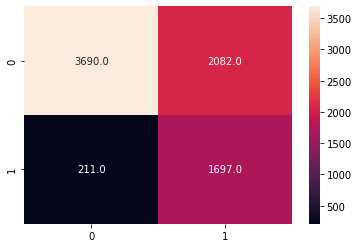

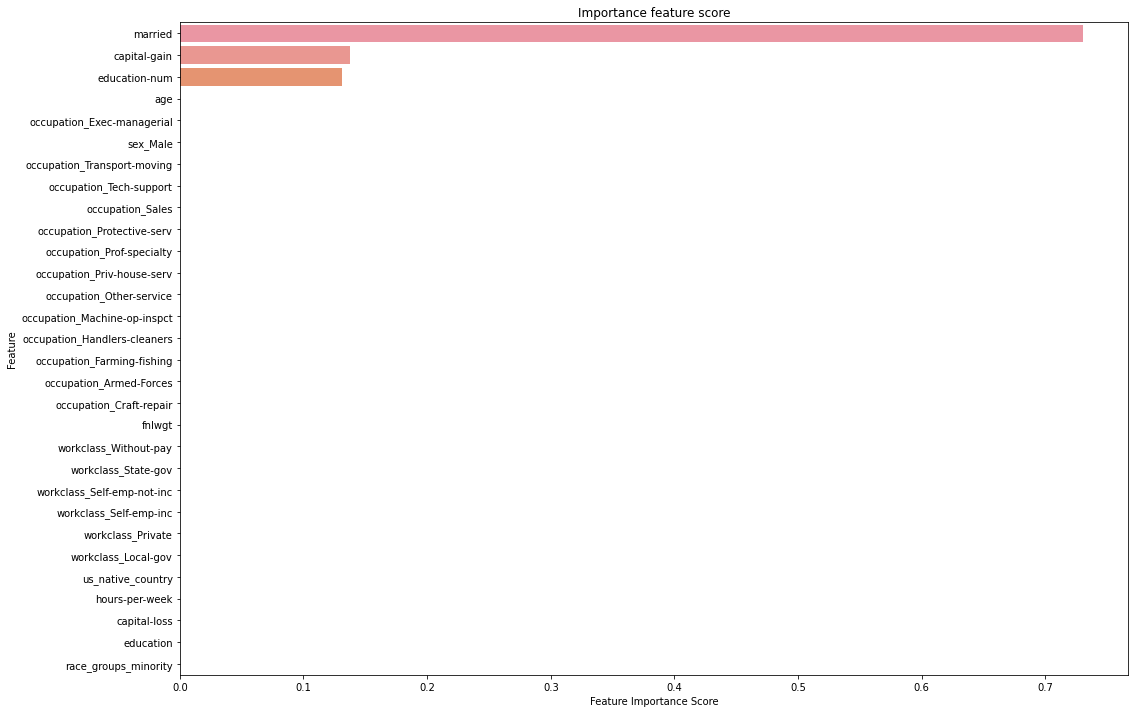

In [ ]:
model_evaluation(decision_tree)

### Hyper parameter tuning

In [ ]:
scoring_metrics = ['accuracy','recall']

#### `RandomizedSearchCV`

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy'],
    'random_state': [42], 
    'class_weight':['balanced'],
    'max_depth': range(2,11),
    'min_samples_split': range(5,25),
    'min_samples_leaf': range(5,51)
}

classifier = DecisionTreeClassifier()

In [ ]:
rand_est = RandomizedSearchCV(classifier, parameters, n_iter=100, cv=3, refit='accuracy', scoring=scoring_metrics, random_state=42).fit(X, y.values.ravel())

In [ ]:
print(rand_est.best_estimator_)
print(rand_est.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=31, min_samples_split=22,
                       random_state=42)
{'random_state': 42, 'min_samples_split': 22, 'min_samples_leaf': 31, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': 'balanced'}


Accuracy train score is:  0.8174320687559684
Accuracy test score is:  0.8114583333333333 

Balanced accuracy train score is:  0.8166354443667915
Balanced accuracy test score is:  0.8094825594825594 

Precision train score is:  0.598159509202454
Precision test score is:  0.5879877582249426 

Recall train score is:  0.8150470219435737
Recall test score is:  0.8055555555555556 

F1 train score is:  0.6899601946041575
F1 test score is:  0.6797877045555064 

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      5772
           1       0.59      0.81      0.68      1908

    accuracy                           0.81      7680
   macro avg       0.76      0.81      0.77      7680
weighted avg       0.84      0.81      0.82      7680
 



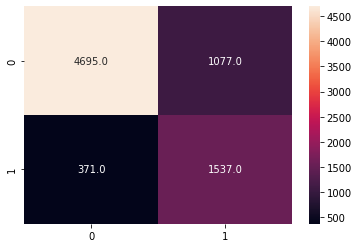

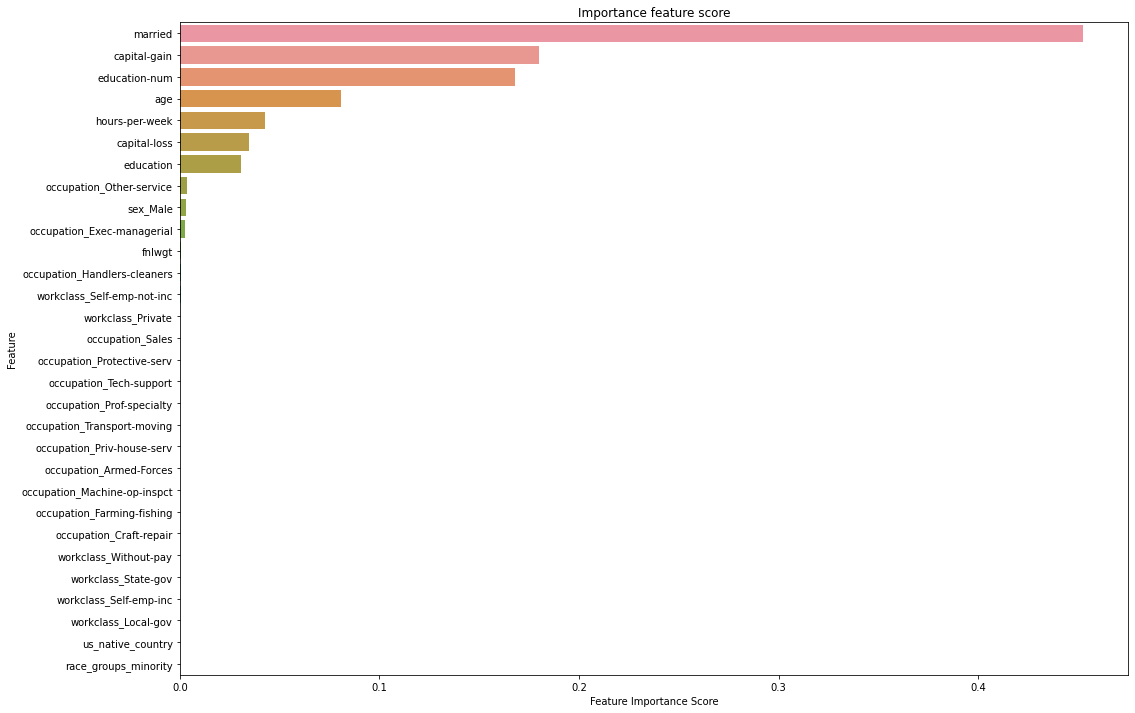

In [ ]:
model_evaluation(rand_est.best_estimator_)

#### `GridSearchCV`

In [ ]:
parameters = {
    'criterion' : ['entropy'],
    'random_state': [42], 
    'class_weight':['balanced'],
    'max_depth': range(5,11),
    'min_samples_split': range(18, 25),
    'min_samples_leaf': range(25, 36)
}

In [ ]:
grid_tree_cv = GridSearchCV(classifier, parameters, cv=5, refit='accuracy', scoring=scoring_metrics).fit(X, y.values.ravel())

In [ ]:
print(grid_tree_cv.best_estimator_)
print(grid_tree_cv.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=25, min_samples_split=18,
                       random_state=42)
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 18, 'random_state': 42}


Accuracy train score is:  0.8157392134733917
Accuracy test score is:  0.8096354166666667 

Balanced accuracy train score is:  0.8176602785003372
Balanced accuracy test score is:  0.8114275378426322 

Precision train score is:  0.594305153080509
Precision test score is:  0.5837087087087087 

Recall train score is:  0.8214907697666318
Recall test score is:  0.8149895178197065 

F1 train score is:  0.6896702975363697
F1 test score is:  0.6802274715660543 

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      5772
           1       0.58      0.81      0.68      1908

    accuracy                           0.81      7680
   macro avg       0.76      0.81      0.77      7680
weighted avg       0.84      0.81      0.82      7680
 



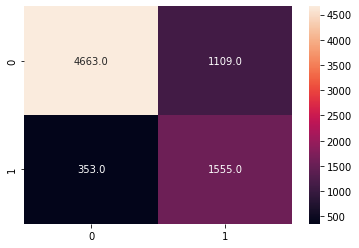

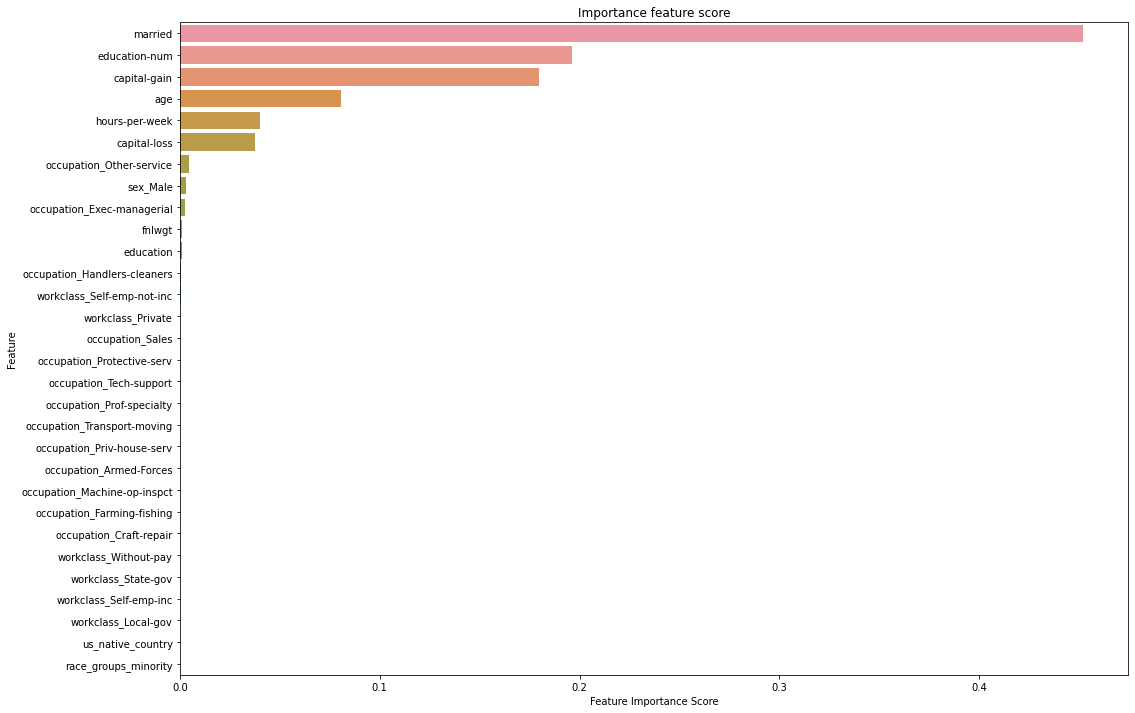

In [ ]:
model_evaluation(grid_tree_cv.best_estimator_)

## `RandomForestClassifier`

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state= 42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=42)

Accuracy train score is:  0.9871082559249935
Accuracy test score is:  0.8404947916666666 

Balanced accuracy train score is:  0.9758830086890791
Balanced accuracy test score is:  0.7456464083822574 

Precision train score is:  0.9945504087193461
Precision test score is:  0.7366597366597366 

Recall train score is:  0.9535005224660397
Recall test score is:  0.5571278825995807 

F1 train score is:  0.973592958122166
F1 test score is:  0.6344374813488511 

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5772
           1       0.74      0.56      0.63      1908

    accuracy                           0.84      7680
   macro avg       0.80      0.75      0.77      7680
weighted avg       0.83      0.84      0.83      7680
 



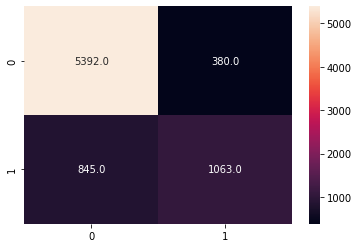

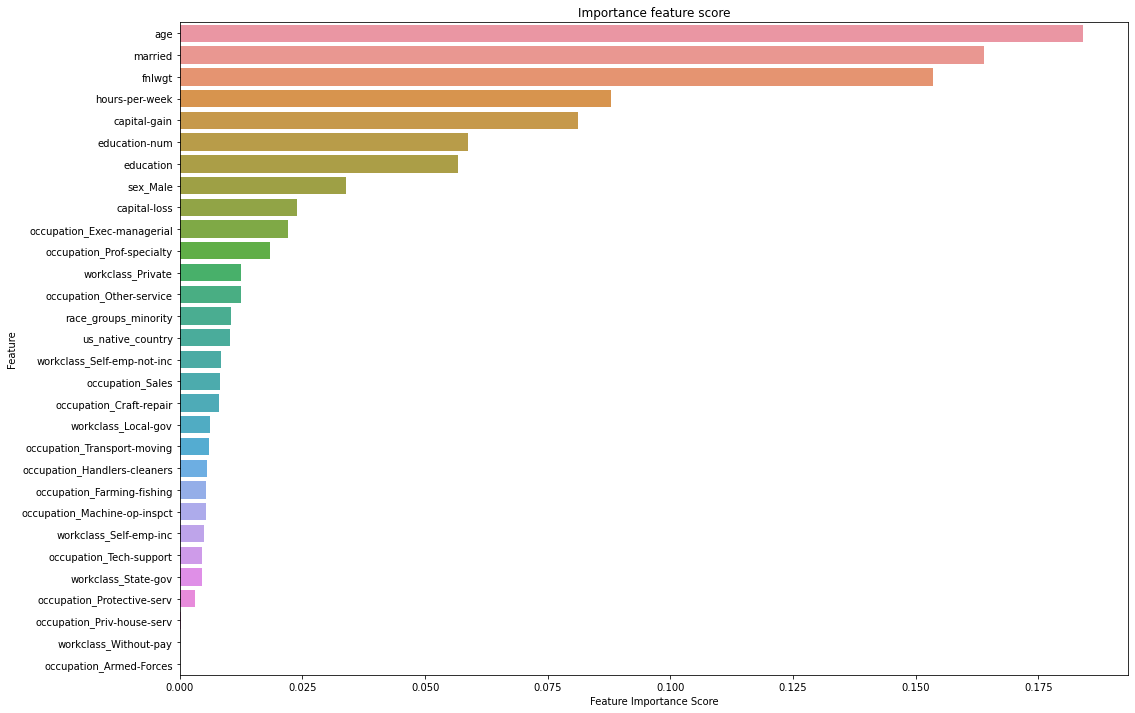

In [ ]:
model_evaluation(rf)

### Hyper parameter tuning

In [ ]:
scoring_metrics = ['accuracy','f1_macro']

#### `RandomizedSearchCV`

In [ ]:
parameters = {
    'n_estimators': range(300, 351, 10), # 5
    'criterion' : ['gini'],
    'random_state': [42], 
    'class_weight':['balanced'],
    'max_depth': range(9,13), # 4
    'min_samples_split': range(10,16), # 6
    'min_samples_leaf': range(5,25) # 20
}

rf_classifier = RandomForestClassifier()

In [ ]:
rand_rf_est = RandomizedSearchCV(rf_classifier, parameters, n_iter=100, cv=3, refit='accuracy', scoring=scoring_metrics).fit(X, y.values.ravel())

In [ ]:
print(rand_rf_est.best_estimator_)
print(rand_rf_est.best_params_)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=11,
                       n_estimators=310, random_state=42)
{'random_state': 42, 'n_estimators': 310, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_depth': 12, 'criterion': 'gini', 'class_weight': 'balanced'}


Accuracy train score is:  0.8240298637034464
Accuracy test score is:  0.8247395833333333 

Balanced accuracy train score is:  0.8447044107701146
Balanced accuracy test score is:  0.8456853079494588 

Precision train score is:  0.5994579307094037
Precision test score is:  0.5995042492917847 

Recall train score is:  0.8859282479972135
Recall test score is:  0.8873165618448637 

F1 train score is:  0.7150688782682035
F1 test score is:  0.7155536770921387 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      5772
           1       0.60      0.89      0.72      1908

    accuracy                           0.82      7680
   macro avg       0.78      0.85      0.79      7680
weighted avg       0.87      0.82      0.83      7680
 



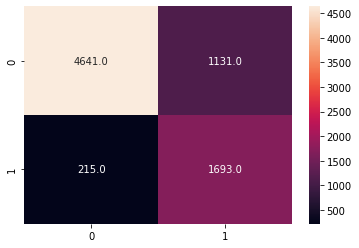

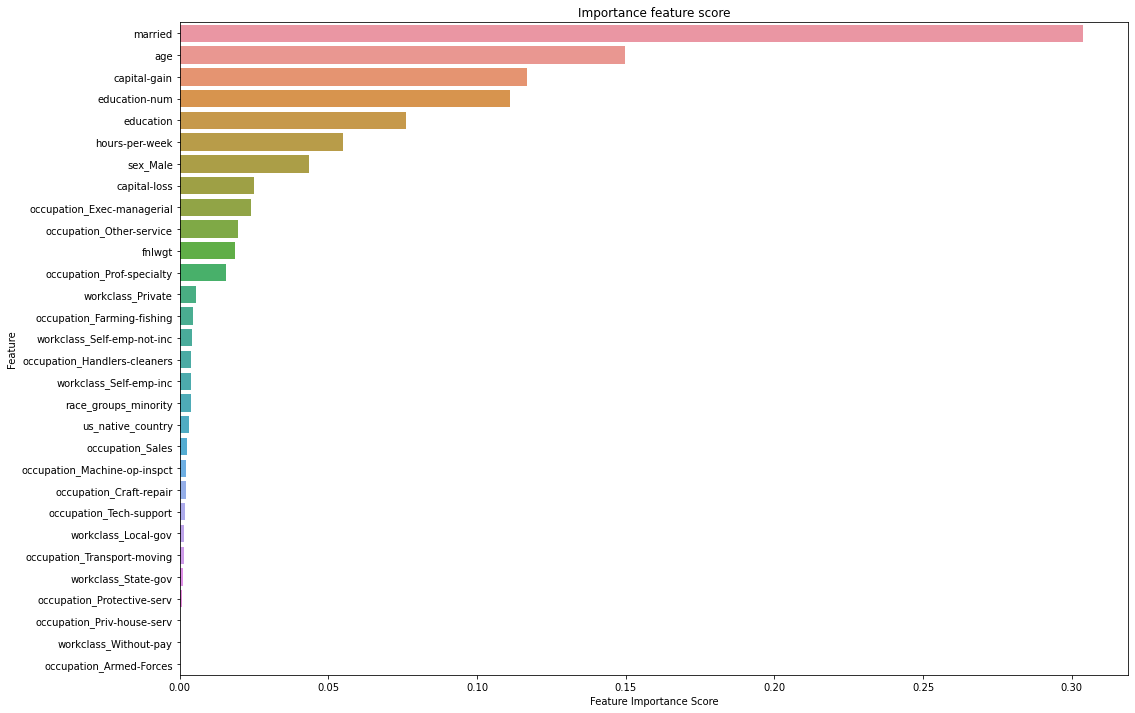

In [ ]:
model_evaluation(rand_rf_est.best_estimator_)

#### `GridSearchCV`

In [ ]:
parameters = {
    'n_estimators': range(340, 361, 10), # 3
    'criterion' : ['gini'],
    'random_state': [42], 
    'class_weight':['balanced'],
    'max_depth': range(12,15), # 3
    'min_samples_split': range(13,16), # 3
    'min_samples_leaf': range(4,7) # 3
}

In [ ]:
rand_rf_grid = GridSearchCV(rf_classifier, parameters, cv=3, refit='accuracy', scoring=scoring_metrics).fit(X, y.values.ravel())

In [ ]:
print(rand_rf_grid.best_estimator_)
print(rand_rf_grid.best_params_)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_leaf=4, min_samples_split=13,
                       n_estimators=360, random_state=42)
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 360, 'random_state': 42}


Accuracy train score is:  0.8341869953989062
Accuracy test score is:  0.83671875 

Balanced accuracy train score is:  0.852632365715917
Balanced accuracy test score is:  0.8552336807053789 

Precision train score is:  0.6158948383984564
Precision test score is:  0.618909090909091 

Recall train score is:  0.8894113549285964
Recall test score is:  0.8920335429769392 

F1 train score is:  0.7278039048026224
F1 test score is:  0.7307857449549163 

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      5772
           1       0.62      0.89      0.73      1908

    accuracy                           0.84      7680
   macro avg       0.79      0.86      0.81      7680
weighted avg       0.87      0.84      0.85      7680
 



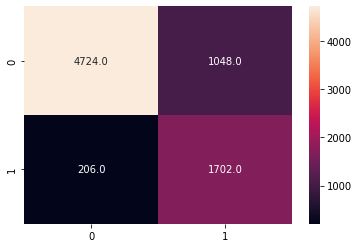

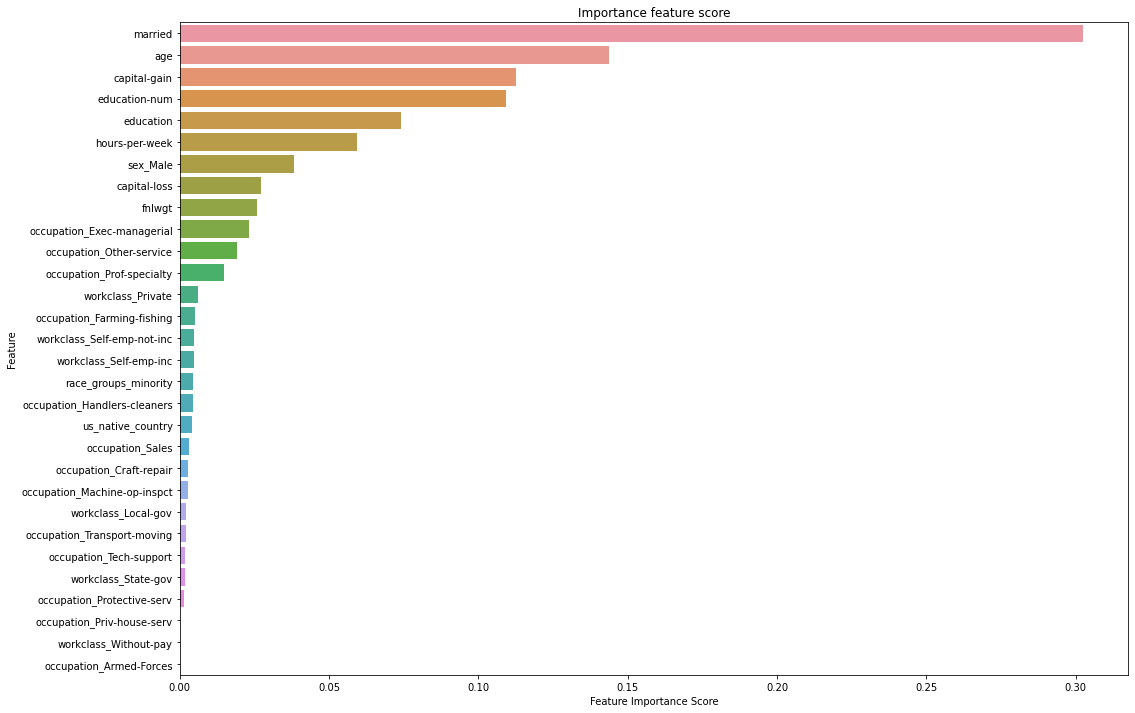

In [ ]:
model_evaluation(rand_rf_grid.best_estimator_)

# Chosen Model: `RandomForestClassifier`

## Hyperparameters
```{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 360, 'random_state': 42}```

In [ ]:
rf_classifier_final = RandomForestClassifier(class_weight='balanced'
                                        , criterion='gini'
                                        , max_depth=14
                                       , min_samples_leaf=4
                                       , min_samples_split=13
                                       , n_estimators=360
                                       , random_state=42)

rf_classifier_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_leaf=4, min_samples_split=13,
                       n_estimators=360, random_state=42)

Accuracy train score is:  0.8370952339612814
Accuracy test score is:  0.8151041666666666 

Balanced accuracy train score is:  0.8551509222822502
Balanced accuracy test score is:  0.8243635507786451 

Precision train score is:  0.6206185567010309
Precision test score is:  0.5894428152492669 

Recall train score is:  0.8911529083942877
Recall test score is:  0.8427672955974843 

F1 train score is:  0.7316794166011296
F1 test score is:  0.6937014667817083 

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      5772
           1       0.59      0.84      0.69      1908

    accuracy                           0.82      7680
   macro avg       0.76      0.82      0.78      7680
weighted avg       0.85      0.82      0.82      7680
 



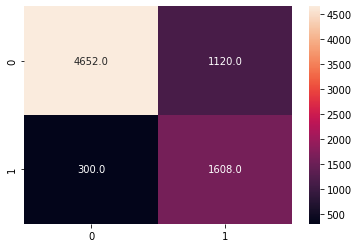

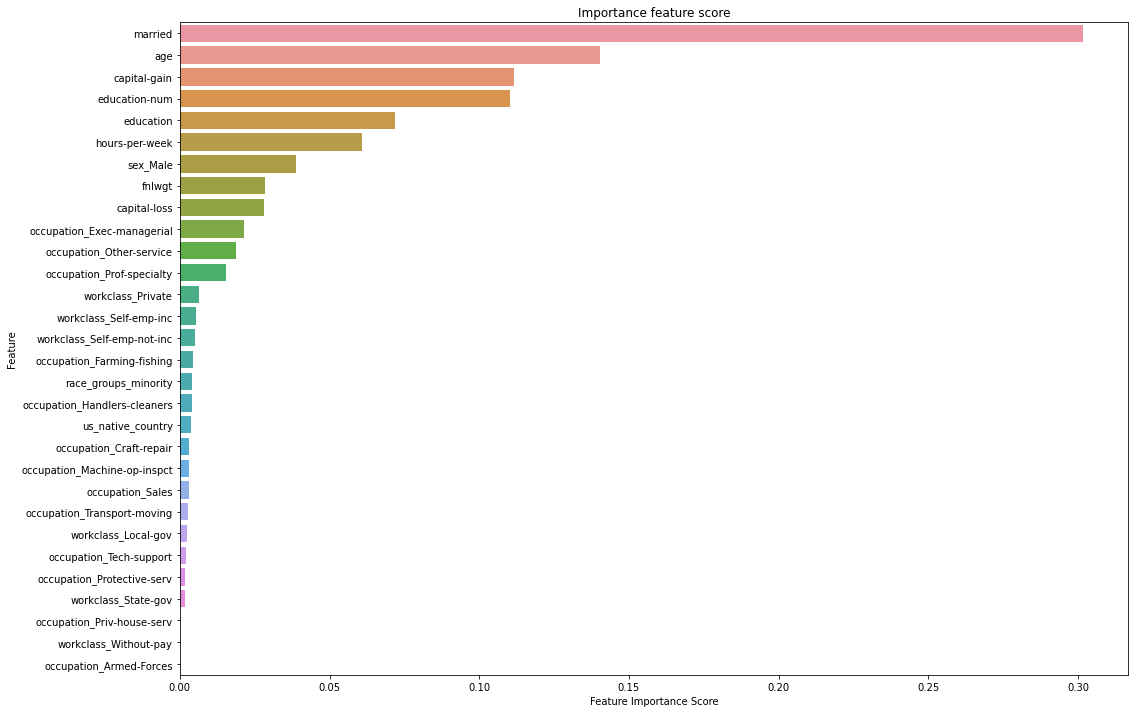

In [ ]:
model_evaluation(rf_classifier_final)